In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()



In [3]:
# list of keys present in the dataset

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer['target_names'])  # y

['malignant' 'benign']


In [8]:
print(cancer['feature_names'])    # column names x

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print((cancer['data']).shape)   # dimensions

# Since the dataframe is now concatenated with the target variable, the shape of the dataset is changed. Use .shape() to look at the size of the dataframe. It is now (569, 31).

(569, 30)


In [10]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))

In [12]:
df_cancer.shape

(569, 31)

EDA

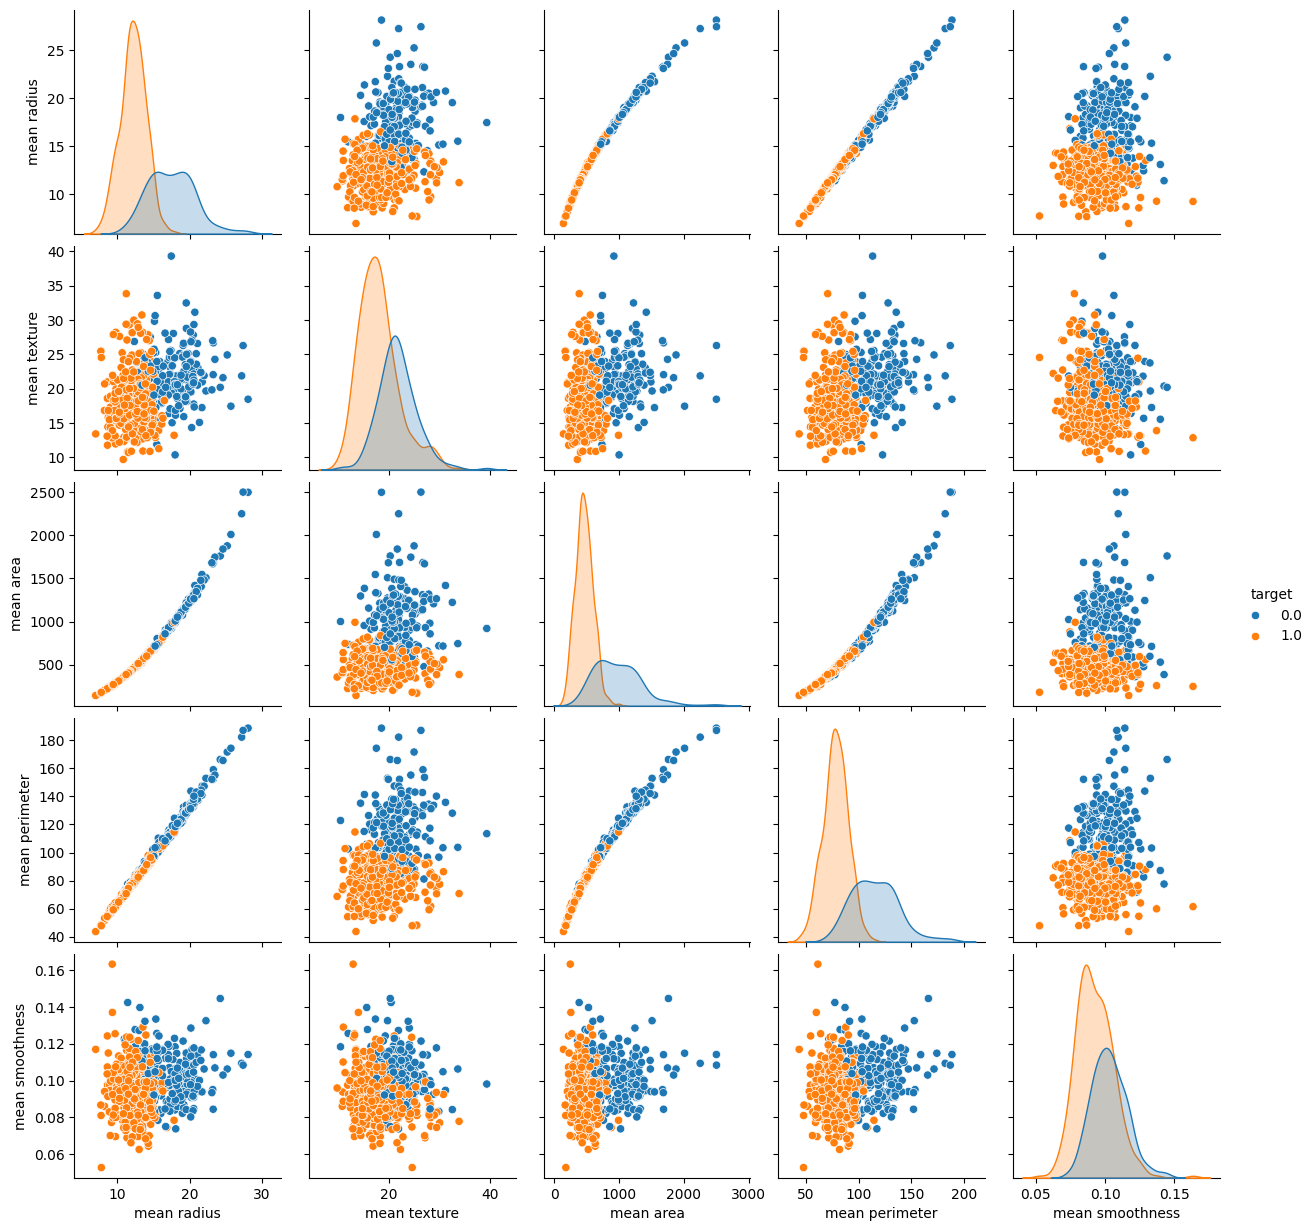

In [13]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<Axes: ylabel='count'>

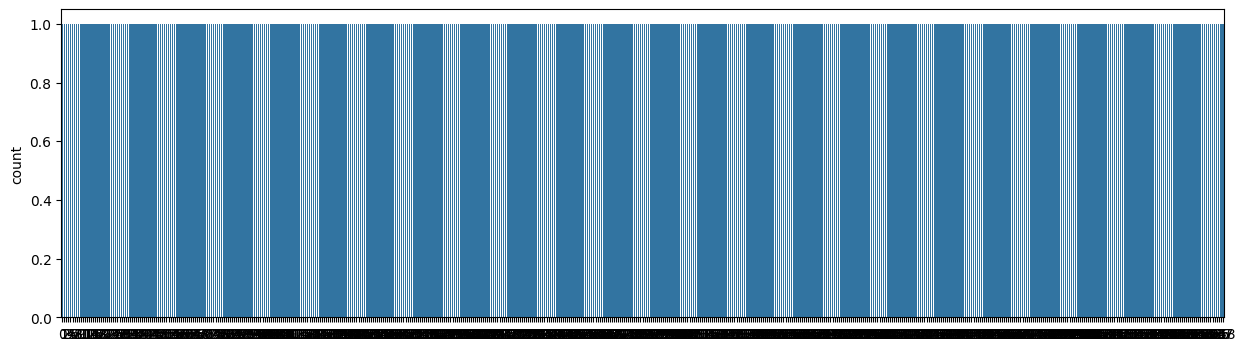

In [19]:
plt.figure(figsize=(15,4))

sns.countplot(df_cancer['target'], label = "Count")
#plt.ylim(1, 3)

<Axes: xlabel='mean area', ylabel='mean smoothness'>

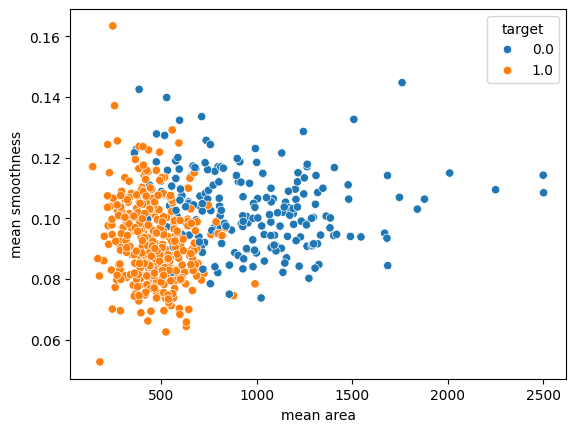

In [20]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

<Axes: >

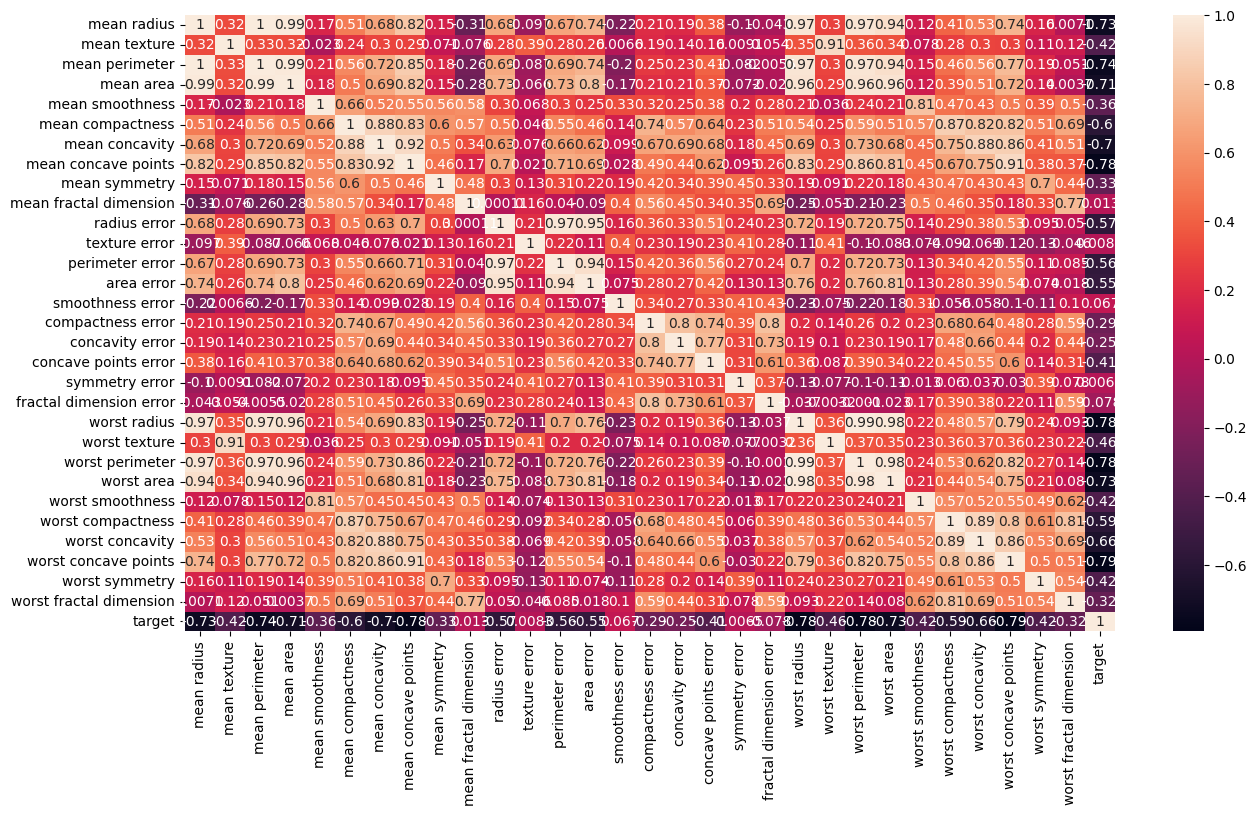

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df_cancer.corr(), annot=True)

In [22]:
X = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [25]:
y_predict = svc_model.predict(X_test)

<Axes: >

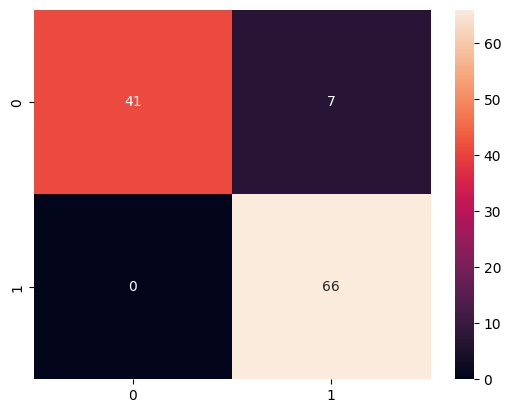

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

